In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

# Matplotlib review

Today we will review some of the things we've learned so far about Matplotlib, and then take them a bit further to prepare you better for Homework 2.

### Styling Components

Last time we learnd how to apply global styles. We can also modify individual components of a figure. For that, it's useful to get an [overview of these components](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure): 

<img src="matplotlib_components.png" alt="Explaining different matplotlib components" style="width: 600px;"/>


We'll use these functions and others to style and annotate an example below: 

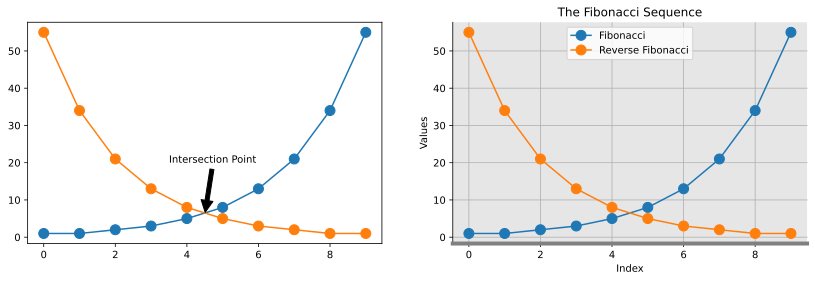

In [30]:
fib_series = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

fig, subfigs = plt.subplots(1, 2, figsize=(14, 4))

subfigs[0].plot(fib_series, marker="o", markersize=10, label="Fibonacci")
subfigs[0].plot(fib_series[::-1], marker="o", markersize=10, label="Reverse Fibonacci")

# Annotate the point xy with text text. In the simplest form, the text is placed at xy.
subfigs[0].annotate('Intersection Point', xy=(4.5, 6), xytext=(3.5, 20),
            arrowprops=dict(facecolor='black', shrink=0.05))

# We'll customize styling for the second plot
sub_2 = subfigs[1]
sub_2.plot(fib_series, marker="o", markersize=10, label="Fibonacci")
sub_2.plot(fib_series[::-1], marker="o", markersize=10, label="Reverse Fibonacci")

# Titles and labels 
sub_2.set_title('The Fibonacci Sequence')   
sub_2.set_xlabel("Index")
sub_2.set_ylabel("Values")

# The legend
sub_2.legend()

# The grid lines
sub_2.grid(True)

# Turning off the top and right axis
sub_2.spines['top'].set_visible(False)
sub_2.spines['right'].set_visible(False)

# Changing the bottom axis
sub_2.spines['bottom'].set_color('gray')
# Increase width of bottom spine
sub_2.spines['bottom'].set_linewidth(4)

# Changinbg the background color of the plot area
sub_2.set_facecolor((0.9,0.9,0.9))

### Pies, Sunburst, and Polar Coordinates

Let's load a data set with transactions from a bakery.

In [3]:
bakery = pd.read_csv('./bakery.csv')
bakery

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


We see there's information about "part" and "type" of day in the data. We can quickly check what proportion of transactions happens in each:

In [4]:
bakery['Daypart'].value_counts(normalize=True)

Daypart
Afternoon    0.564149
Morning      0.409811
Evening      0.025357
Night        0.000683
Name: proportion, dtype: float64

In [5]:
bakery['DayType'].value_counts(normalize=True)

DayType
Weekday    0.624518
Weekend    0.375482
Name: proportion, dtype: float64

There seem to be very few transactions at night. For simplicity, let's drop them:

In [6]:
bakery = bakery[bakery['Daypart']!='Night']

Now let's visualize these proportions by creating a quick pie chart using [Matplotlib's built-in ``.pie()``](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html) method:

In [7]:
# Create a new dataframe with counts of items by daypart
bakery_by_daypart = (
    bakery.groupby('Daypart')
    .agg(
        num_items = ('Items', 'count'),
    ).reset_index()
)
bakery_by_daypart

,Daypart,num_items
0,Afternoon,11569
1,Evening,520
2,Morning,8404


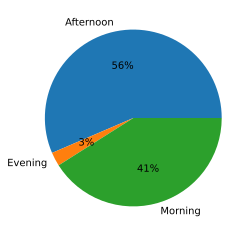

In [8]:
fig, subfig = plt.subplots(figsize = (4,4))

subfig.pie(
    x      = bakery_by_daypart['num_items'], 
    labels = bakery_by_daypart['Daypart'],
    autopct='%1.0f%%'
)

plt.show()

A variation of a pie chart is a donut chart. They are the same w.r.t. readability, but differ in their aesthetics: 

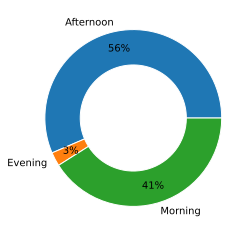

In [9]:
fig, subfig = plt.subplots(figsize = (4,4))

subfig.pie(
    x      = bakery_by_daypart['num_items'], 
    labels = bakery_by_daypart['Daypart'],
    wedgeprops = dict(width = 0.4, edgecolor = 'white'), # set width of wedges to 40%
    autopct='%1.0f%%',
    pctdistance=0.8
)

plt.show()

Now how can we also encode whether it's a weekend or a weekday?

In [10]:
# Let's put counts by daytype in the outer donut
outer_donut = bakery.groupby('DayType').count()['Items']
outer_donut

DayType
Weekday    12803
Weekend     7690
Name: Items, dtype: int64

In [11]:
# Let's put counts by daytype & daypart in the inner donut. 
# Here we're creating nexted groupings!
inner_donut = bakery.groupby(['DayType', 'Daypart']).count()['Items']
inner_donut

DayType  Daypart  
Weekday  Afternoon    7273
         Evening       356
         Morning      5174
Weekend  Afternoon    4296
         Evening       164
         Morning      3230
Name: Items, dtype: int64

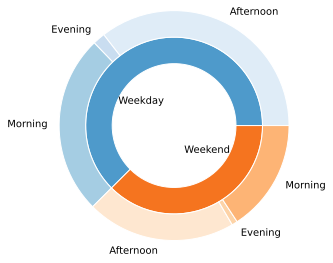

In [12]:
fig, subfig = plt.subplots(figsize = (4,4))

# Inner donut
subfig.pie(
    x      = outer_donut, 
    labels = outer_donut.index,
    radius = 1,
    wedgeprops = dict(width = 0.3, edgecolor = 'white'),
    colors = [plt.cm.Blues(150), plt.cm.Oranges(150)],
    labeldistance = 0.3
)

# Outer donut
subfig.pie(
    x      = inner_donut, 
    labels = inner_donut.index.get_level_values(1),
    radius = 1.3,
    wedgeprops = dict(width = 0.3, edgecolor = 'white'),
    colors = [plt.cm.Blues(30*x) for x in range(1,4)] + [plt.cm.Oranges(30*x) for x in range(1,4)],
    labeldistance = 1.1
)

plt.show()

This chart is actually called a **Sunburst** plot which is great for showing nested hierarchical data. 

We've created these pie and donut charts using Matplotlib's built-in `.pie()` method. Which you should probably use if you're going for an ordinary piechart.

But Matplotlib is much more flexible than we've seen so far. As an exercise, let's try to recreate this same chart without using `.pie()`!

How? Well, let's think of this donut chart as a "weird" bar chart. Look at this bar chart below. It has `x`, or the "position" along the x-axis – here, a categorical variable. It has a `height`, which is simply how tall each bar is, encoded by our sales count.

DayType  Daypart  
Weekday  Afternoon    7273
         Evening       356
         Morning      5174
Weekend  Afternoon    4296
         Evening       164
         Morning      3230
Name: Items, dtype: int64


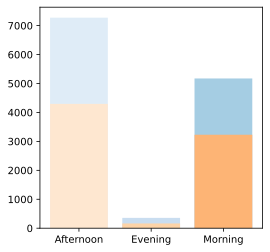

In [13]:
fig, subfig = plt.subplots(figsize = (4,4))

inner_donut = bakery.groupby(['DayType', 'Daypart']).count()['Items']
print(inner_donut)

subfig.bar(
    height = inner_donut, 
    x = inner_donut.index.get_level_values(1),
    color = [plt.cm.Blues(30*x) for x in range(1,4)] + [plt.cm.Oranges(30*x) for x in range(1,4)]
)

plt.show()

But that's the conventional bar chart setup we're used to. If we wanted to, we can modulate other parameters of the bars, such as their widths, bottom starting positions, etc. We can set them to constant values, or tie them to our variables:

DayType
Weekday    12803
Weekend     7690
Name: Items, dtype: int64
[0, 12803]
--- Inner Donut ---
DayType  Daypart  
Weekday  Afternoon    7273
         Evening       356
         Morning      5174
Weekend  Afternoon    4296
         Evening       164
         Morning      3230
Name: Items, dtype: int64
[0, 7273, 7629, 12803, 17099, 17263]


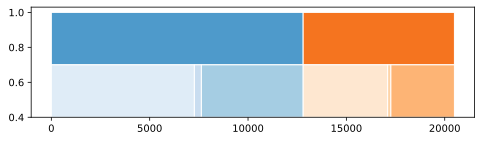

In [14]:
fig, subfig = plt.subplots(figsize = (8,2))

# Count by daytype
outer_donut = bakery.groupby('DayType').count()['Items']
print(outer_donut)
# To arrange each daytype's bar we need to keep track of cumulative width of previous types:
outer_donut_edges = [0] + list(np.cumsum(outer_donut[:-1]))
print(outer_donut_edges)

# Top bar
subfig.bar(
    x = outer_donut_edges,
    width = outer_donut,
    bottom = 0.7,
    height = 0.3,
    edgecolor = 'white',
    linewidth = 1,
    align = 'edge',
    color = [plt.cm.Blues(150), plt.cm.Oranges(150)]
)

print("--- Inner Donut ---")
# Count by daytype and daypart
inner_donut = bakery.groupby(['DayType', 'Daypart']).count()['Items']
print(inner_donut)
# To arrange each type's bar we need to keep track of cumulative width of previous types:
inner_donut_edges = [0] + list(np.cumsum(inner_donut[:-1]))
print(inner_donut_edges)

# Bottom bar
subfig.bar(
    x = inner_donut_edges,
    width = inner_donut,
    bottom = 0.4,
    height = 0.3,
    edgecolor = 'white',
    linewidth = 1,
    align = 'edge',
    color = [plt.cm.Blues(30*x) for x in range(1,4)] + [plt.cm.Oranges(30*x) for x in range(1,4)]
)

plt.show()

You may see where this is going now. Hint: imagine wrapping the above bar chart around a circle.

![Polar coordinates grid](./polar_grid.png)

Now, before we make this into a pie chart, let's simplify a bit. Let's just plot a stacked bar with values 8 and 2.

<BarContainer object of 2 artists>

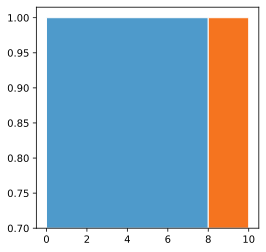

In [15]:
fig, subfig = plt.subplots(figsize = (4,4))

# the input data
widths = [8,2]
# calcluate the x positions
xs = [0] + list(np.cumsum(widths[:-1]))

subfig.bar(
    x = xs,
    width = widths,  
    bottom = 0.7,
    height = 0.3,
    edgecolor = 'white',
    linewidth = 1,
    align = 'edge',
    color = [plt.cm.Blues(150), plt.cm.Oranges(150)]
)


Now we're taking our simple bar chart and plotting it in polar coordinates. 

There are 2 things we need to do here: 

* Tell Matplotlib that we want to use polar coordinates
* Convert our width values to Radians. A full circle is 2 pi in Radians. 



Our values in radians: [5.026548245743669, 1.2566370614359172]


<BarContainer object of 2 artists>

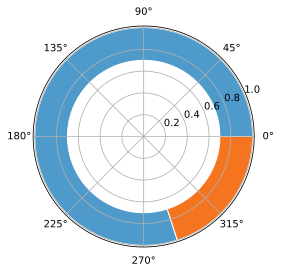

In [16]:
fig, subfig = plt.subplots(figsize = (4,4), subplot_kw = dict(projection = 'polar'))

widths = [8,2]

widths = [2 * np.pi * x / sum(widths) for x in widths]
print(f"Our values in radians: {widths}")

xs = [0] + list(np.cumsum(widths[:-1]))

subfig.bar(
    x = xs,
    width = widths,
    bottom = 0.7,
    height = 0.3,
    edgecolor = 'white',
    linewidth = 1,
    align = 'edge',
    color = [plt.cm.Blues(150), plt.cm.Oranges(150)]
)


[3.925419484107756, 2.3577658230718304]
[0, 3.925419484107756]


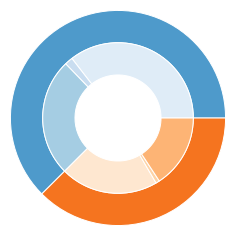

In [17]:
fig, subfig = plt.subplots(figsize = (4,4), subplot_kw = dict(projection = 'polar'))

# Count by daytype
outer_donut = bakery.groupby('DayType').count()['Items']
# Convert count to a normalized angle
outer_donut = [x*2*np.pi / sum(outer_donut) for x in outer_donut]
print(outer_donut)
# To arrange each daytype's bar we need to keep track of cumulative angle of previous types:
outer_donut_edges = [0] + list(np.cumsum(outer_donut[:-1]))
print(outer_donut_edges)

# Outer donut
subfig.bar(
    x = outer_donut_edges,
    width = outer_donut,
    bottom = 0.7,
    height = 0.3,
    edgecolor = 'white',
    linewidth = 1,
    align = 'edge',
    color = [plt.cm.Blues(150), plt.cm.Oranges(150)]
)

# Count by daytype and daypart
inner_donut = bakery.groupby(['DayType', 'Daypart']).count()['Items']
# Convert count to a normalized angle
inner_donut = [x*2*np.pi / sum(inner_donut) for x in inner_donut]
# To arrange each ype's bar we need to keep track of cumulative angle of previous types:
inner_donut_edges = [0] + list(np.cumsum(inner_donut[:-1]))

# Inner donut
subfig.bar(
    x = inner_donut_edges,
    width = inner_donut,
    bottom = 0.4,
    height = 0.3,
    edgecolor = 'white',
    linewidth = 1,
    align = 'edge',
    color = [plt.cm.Blues(30*x) for x in range(1,4)] + [plt.cm.Oranges(30*x) for x in range(1,4)]
)

subfig.set_axis_off()
plt.show()

### Part 2: Faceting by Categories

With Matplotlib's power and flexibility come some difficulties: there are many commonly-used types of charts that are not as straightforward to make using commonly-used data sets.

Let's make a boxplot in Matplotlib:
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot

Here we're looking at a dataframe of penguin measurements. Besides this data format being common, it's what is called "tidy" data: each row is an observation, each column is a variable. But that's not the format Matplotlib's `.boxplot()` wants the data in.

In [18]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


A box plot in matplotlib, however, wants the data of each category as a separate list. So we have to first extrat this into a list of lists. 

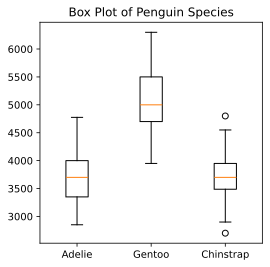

In [31]:
fig, subfig = plt.subplots(figsize = (4,4))

# matplotlib doesn't like NA values, so we'll drop them
penguins = penguins.dropna(subset=['body_mass_g'])

# extract the data for the three species into separate lists
data = [penguins[penguins['species'] == 'Adelie']['body_mass_g'],
      penguins[penguins['species'] == 'Gentoo']['body_mass_g'],
      penguins[penguins['species'] == 'Chinstrap']['body_mass_g']]

subfig.boxplot(data, labels = ['Adelie', 'Gentoo', 'Chinstrap'])
plt.title('Box Plot of Penguin Species')

plt.show()

Obviously, that's inconvenient. For the record, we could also use Pandas to do this more efficiently: 

body_mass_g    Axes(0.125,0.11;0.775x0.77)
dtype: object

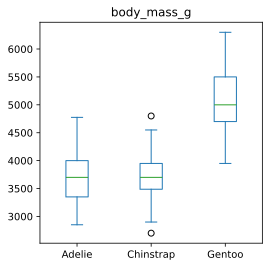

In [20]:
penguin_weights = penguins[["species", "body_mass_g"]]
penguin_weights.plot(kind='box', by='species', figsize = (4,4))

But Pandas plotting is also limited, so let's look at another library that has great support for common scientific charts. 

# Seaborn

We often have a chart in mind, and we don't have to be picky about how to achieve it in Python. Seaborn is a good library that has a lot of very useful advanced plots built in that are tricky to re-create with Matplotlib.

We won't cover all the plots here, just give you a flavor of what's possible.

In [21]:
import seaborn as sns

Now, let's recreate the exact same boxplot in Seaborn:

<Axes: xlabel='species', ylabel='body_mass_g'>

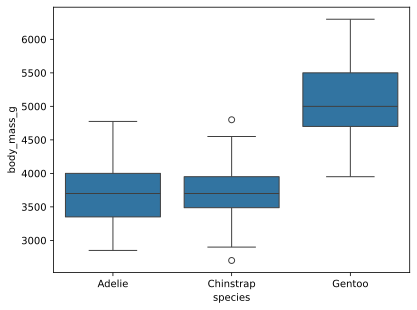

In [22]:
sns.boxplot(
    data = penguin_weights,
    x = 'species',
    y = 'body_mass_g'
)

You can see the slightly different syntax as well. Seaborn is very dataframe-centric, which has its pros and cons. Instead of passing separate lists or series, we specify a dataframe, and then map variables from the data frame to a chart's attributes.

To see this better, let's create a scatterplot (that Seaborn calls a relational plot for some reason?): 

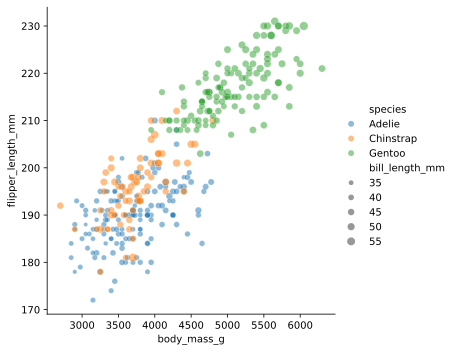

In [23]:
sns.relplot(
    data = penguins,
    x = 'body_mass_g',
    y = 'flipper_length_mm',
    hue = 'species',
    size = 'bill_length_mm',
    alpha = 0.5
)

We can even quickly create a faceted plot simply by tying `col = ` to a variable---no need to manually set up subfigures:

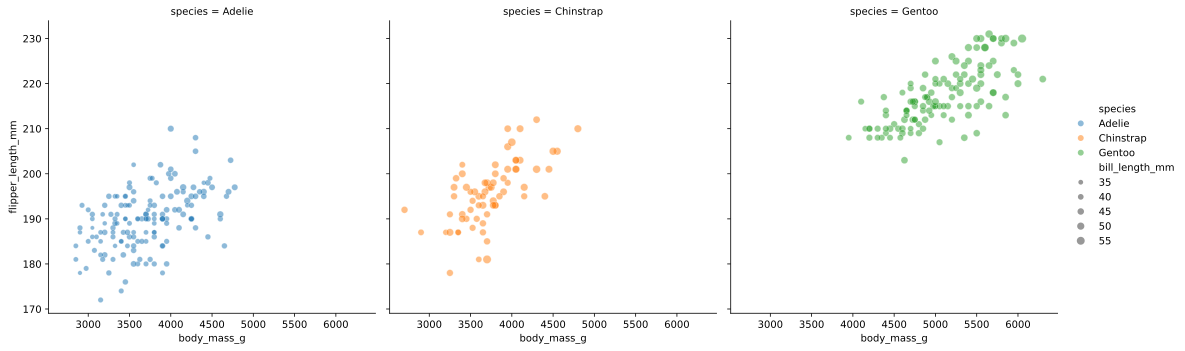

In [24]:
sns.relplot(
    data = penguins,
    x = 'body_mass_g',
    y = 'flipper_length_mm',
    hue = 'species',
    size = 'bill_length_mm',
    alpha = 0.5,
    col = 'species'
)

Seaborn has very user-friendly and powerful categorical plots. We've seen the boxplot already, but there's also strip plots, beeswarm plots, violin plots – all of which you can easily split into subcategories:

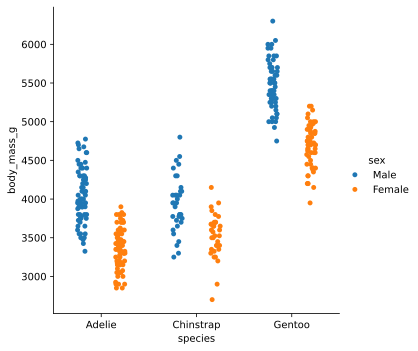

In [25]:
sns.catplot(
    data=penguins,
    kind = "strip", 
    x = "species", 
    y = "body_mass_g", 
    hue = "sex",
    dodge = True)


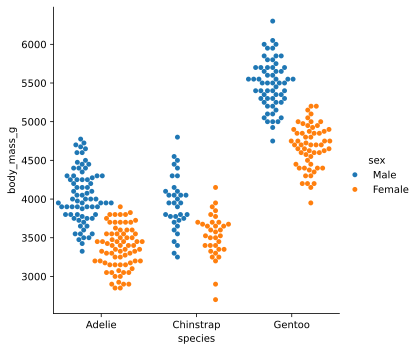

In [26]:
sns.catplot(
    data=penguins,
    kind = "swarm", 
    x = "species", 
    y = "body_mass_g", 
    hue = "sex",
    dodge = True)


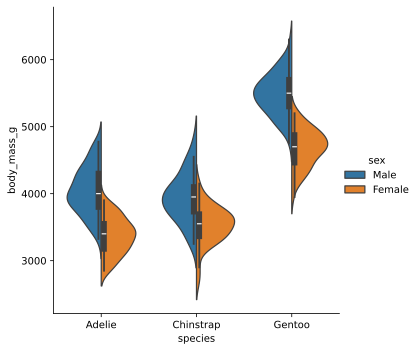

In [27]:
sns.catplot(
    data=penguins,
    kind = "violin", 
    x = "species", 
    y = "body_mass_g", 
    hue = "sex",
    split = True)

For datasets with categories, we can use "joint plots" to get an overview of the distributions and their relationships:

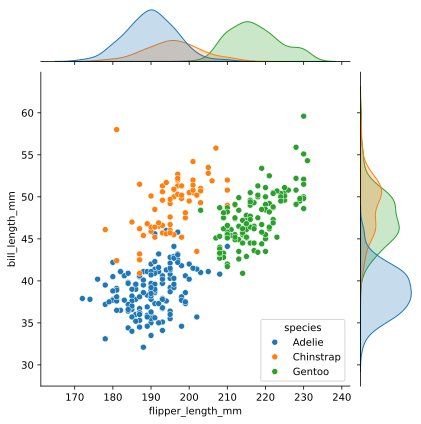

In [28]:
sns.jointplot(
    data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

And we can create scatterplot matrices (pairplots in Seaborn) to show relationships:

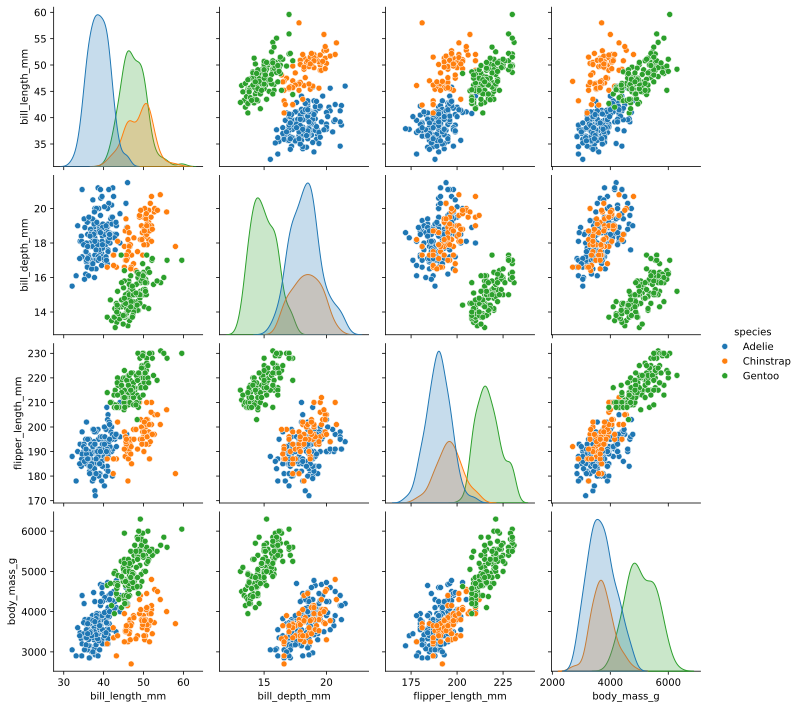

In [29]:
sns.pairplot(data=penguins, hue="species")

Check out the [seaborn gallery](https://seaborn.pydata.org/examples/index.html) for an overview of all the possible chart types! 